## Projeto Final

Passos de desenvolvimento:

* Elabore uma problemática que possa ser resolvida através de agrupamentos/clusters.
* Escolha uma base de dados com base no tema definido para a sua equipe;
* Construa uma análise exploratória dos dados;
* Explore os dados e construa clusters (justifique a escolha do algoritmo utilizado);
* Avalie os Clusters gerados (use as métricas vistas em aula e justifique/explore os resultados);
* Forneça uma descrição detalhada de cada Cluster gerado.
* Apresente o seu trabalho (slides “recomendações para o CEO” e código) em nossa última aula.


Grupo 8 :

* Marcos César Madruga Alves Pinheiro (mcmap@cesar.school)

* Raphael Friederich Ribeiro Filho (rfrf@cesar.school)

* Maria Paula Martins Alves (mpma@cesar.school)

* Maria Eduarda Alves ( meas2@cesar.school)


Equipe 8: Logística/Comercial (compras/vendas/produtos)

In [236]:
# datasets sugeridos

# dataset amazon
# https://www.kaggle.com/datasets/mos3santos/vendas-da-amazon



Informações do dataset

| Column Name            | Description                                          | Type    |
|------------------------|------------------------------------------------------|---------|
| product_id             | id do produto                                        | string  |
| product_name           | nome do produto                                      | string  |
| category               | categorias ao qual o produto pertence                | string  |
| discounted_price       | valor do desconto aplicado ao produto                | int     |
| actual_price           | preço total do produto sem desconto                  | float   |
| discounted_percentage  | valor percentual de desconto aplicado ao produto     | int     |
| rating                 | avaliação                                            | float   |
| rating_count           | contagem de avaliação                                | float   |
| about_product          | descrição do produto                                 | string  |
| user_name              | nome do usuário                                      | string  |
| review_id              | id da review                                         | string  |
| review_title           | título da review                                     | string  |
| review_content         | descrição da avaliação                               | string  |
| img_link               | link da imagem do produto                            | string  |
| product_link           | link do produto na amazon                            | string  |
| user_id                | id do usuário                                        | string  |


# Importar as bibliotecas

In [237]:
!pip install wordcloud

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from PIL import Image
from wordcloud import WordCloud
import plotly.express as px

In [239]:
# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

pasta_base = '/content/drive/MyDrive/dados/datasets/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [240]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Carregar dataset

In [241]:
df_amazon = pd.read_csv(pasta_base + 'amazon.csv')

#Limpeza de dados

In [242]:
df_amazon.isnull().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


Vale a pena excluir essas duas linha só porque não tem essa rating count? acredito que sim, por causa da sensibilidade de alguns modelos aos dados faltantes

In [243]:
df_amazon.dropna(inplace=True)

In [244]:
df_amazon.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [245]:
df_amazon.drop(columns=['about_product','review_id','img_link', 'product_link'],inplace=True)

In [246]:
df_amazon.duplicated().sum()

np.int64(68)

Encontramos 68 valores duplicados

In [247]:
df_amazon.drop_duplicates(inplace=True)

# Análise exploratória

In [248]:
df_amazon.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,user_id,user_name,review_title,review_content
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928","AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a..."
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363","AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou..."
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905","AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th..."


In [249]:
df_amazon.shape

(1395, 12)

In [250]:
df_amazon.reset_index(inplace=True,drop=True)

In [251]:
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1395 entries, 0 to 1394
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1395 non-null   object
 1   product_name         1395 non-null   object
 2   category             1395 non-null   object
 3   discounted_price     1395 non-null   object
 4   actual_price         1395 non-null   object
 5   discount_percentage  1395 non-null   object
 6   rating               1395 non-null   object
 7   rating_count         1395 non-null   object
 8   user_id              1395 non-null   object
 9   user_name            1395 non-null   object
 10  review_title         1395 non-null   object
 11  review_content       1395 non-null   object
dtypes: object(12)
memory usage: 130.9+ KB


##Transformar os tipos

In [252]:
# Remove símbolo ₹ e separador de milhar
df_amazon['actual_price'] = df_amazon['actual_price'].str.replace('₹', '', regex=False).str.replace(',', '', regex=False)

# Converte para float
df_amazon['actual_price'] = df_amazon['actual_price'].astype(float)

In [253]:
df_amazon['discount_percentage'] = df_amazon['discount_percentage'].str.replace('%', '').astype(float)

In [254]:
# Remove símbolo ₹ e separador de milhar
df_amazon['discounted_price'] = df_amazon['discounted_price'].str.replace('₹', '', regex=False).str.replace(',', '', regex=False)
df_amazon['discounted_price']= df_amazon['discounted_price'].astype(float)

In [255]:
# Excluir as linhas (apenas 1) onde a coluna rating tenha o valor '|'
df_amazon.drop(df_amazon[df_amazon['rating'] == '|'].index, inplace=True)

In [256]:
df_amazon['rating'] = df_amazon['rating'].astype(float)

In [257]:
df_amazon['rating_count'] = df_amazon['rating_count'].str.replace(',','').astype(float)

In [258]:
df_amazon.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1394 entries, 0 to 1394
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1394 non-null   object 
 1   product_name         1394 non-null   object 
 2   category             1394 non-null   object 
 3   discounted_price     1394 non-null   float64
 4   actual_price         1394 non-null   float64
 5   discount_percentage  1394 non-null   float64
 6   rating               1394 non-null   float64
 7   rating_count         1394 non-null   float64
 8   user_id              1394 non-null   object 
 9   user_name            1394 non-null   object 
 10  review_title         1394 non-null   object 
 11  review_content       1394 non-null   object 
dtypes: float64(5), object(7)
memory usage: 141.6+ KB


convertemos as colunas que deveriam ser numéricas em seu devido tipo

In [259]:
df_amazon.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000
mean,3241.220803,5632.927747,47.243902,4.093185,18515.314921
std,7081.940704,11084.162832,21.713449,0.291966,43578.644667
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,347.250000,899.000000,31.000000,4.000000,1183.500000
50%,876.000000,1722.500000,50.000000,4.100000,5065.500000
75%,2098.000000,4686.750000,63.000000,4.300000,17408.250000
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000


Pontos relevantes:
* Os produtos esão variando em sua avaliação entre 2 a 5
* Tivemos produtos com 0% de desconto e seu máximo atingindo 94%
* O menor preço de um produto foi de 39 e seu maior de 139.900

## Analisando os dados

In [260]:
# o mesmo product id aparece mais de uma vez no dataset?
df_amazon['product_id'].value_counts()[:15]

,count
product_id,
B07JW9H4J1,3
B096MSW6CT,3
B08Y1TFSP6,3
B09NVPSCQT,2
B09V12K8NT,2
B0B5LVS732,2
B0BDRVFDKP,2
B0B5B6PQCT,2
B0B3RRWSF6,2


In [261]:
df_amazon[df_amazon['product_id'] == "B07JW9H4J1"]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,user_id,user_name,review_title,review_content
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269.0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...
367,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24270.0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...
599,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269.0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...


Pontos relevantes:

* nós verificamos que não há valores duplicados no dataframe pois consideramos observar todas as linhas encontradas nele. Contudo, ao checar uma coluna específica, podemos observar que existem valores que se duplicam. Por isso, o product id se repete na tabela

In [262]:
# TOP 10 produtos com maior média de preço

print(df_amazon['actual_price'].mean())

df_amazon.groupby(['product_name'])['actual_price'].mean().sort_values(ascending=False)[:10]

5632.92774748924


,actual_price
product_name,
Sony Bravia 164 cm (65 inches) 4K Ultra HD Smart LED Google TV KD-65X74K (Black),139900.0
VU 164 cm (65 inches) The GloLED Series 4K Smart LED Google TV 65GloLED (Grey),85000.0
LG 139 cm (55 inches) 4K Ultra HD Smart LED TV 55UQ7500PSF (Ceramic Black),79990.0
"LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (Copper, Super Convertible 6-in-1 Cooling, HD Filter with Anti-Virus Protection, 2022 Model, PS-Q19YNZE, White)",75990.0
"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM, 128GB Storage) with No Cost EMI & Additional Exchange Offers",74999.0
Samsung 138 cm (55 inches) Crystal 4K Neo Series Ultra HD Smart LED TV UA55AUE65AKXXL (Black),70900.0
MI 138.8 cm (55 inches) 5X Series 4K Ultra HD LED Smart Android TV L55M6-ES (Grey),69999.0
OnePlus 163.8 cm (65 inches) U Series 4K LED Smart Android TV 65U1S (Black),69999.0
Samsung 138 cm (55 inches) Crystal 4K Series Ultra HD Smart LED TV UA55AUE60AKLXL (Black),69900.0


Pontos relevantes:
* O preço destes produtos está bastante distante da média indicando a possibilidade de outliers

In [263]:
# o mesmo cliente comprou diferentes produtos no dataset?
df_amazon.groupby(['user_name'])['product_id'].count().sort_values(ascending=False)

,product_id
user_name,
"$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger Planet,Justice ⚖️,indrajyoti d.,Aditya Kumar,E.C.GEORGE",9
"Satheesh Kadiam,Pritom Chakraborty,Vishwa,Simranpreet Singh,Saptarshi,Amazon Customer,D.RAGHUL,Dharmendra kumar",8
"Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jaspreet singh,Khaja moin,Anand,S.ARUMUGAM",8
"Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh chouhan,Ravi Siddan,Himanshu Goel,Udaykumar",6
"Prashant,Sumesh Sundararajan,Vijay Baitha,S.k nahak,Vikram Kumar,Manish,Jm,amit nayak",6
...,...
"vipin,Bhavana Rangarajan,Raj,Dimple Aggarwal,Jaidev,Harsh pandit,MAHESH CHOUDHARY,Sheetal Pandita",1
"vinu,Goutam Banerjee,Rajeesh P,Sheeja Mol,Suman,anupam kumari singh,Sourabh,Amazon Customer",1
"vijay patel,Gopal pawar,Anish negi,Amazon Customer,Dinakaran N.,Abhilasha,Amazon Customer,Seeker Seeking",1


In [264]:
# Verificar se os produtos são diferentes
df_amazon[df_amazon['user_name']=='Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jaspreet singh,Khaja moin,Anand,S.ARUMUGAM']['product_name']

,product_name
0,Wayona Nylon Braided USB to Lightning Fast Cha...
42,Wayona Nylon Braided 3A Lightning to USB A Syn...
80,Wayona Usb Nylon Braided Data Sync And Chargin...
89,Wayona Nylon Braided (2 Pack) Lightning Fast U...
106,Wayona Nylon Braided 2M / 6Ft Fast Charge Usb ...
220,Wayona Nylon Braided Usb Syncing And Charging ...
367,Wayona Nylon Braided USB to Lightning Fast Cha...
599,Wayona Nylon Braided USB to Lightning Fast Cha...


Pontos relevantes:

* podemos observar que a coluna referente ao usuário está concatenada de acordo com todos os reviews e usuários (id, nome) para o produto específico. Estas colunas foram concatenadas a partir da vírgula
* Para diferentes produtos tivemos o mesmo grupo de usuários

**analisando os grupos de usuários**

In [265]:
# usuários encontrados no dataset

df_amazon_usuarios = df_amazon[['user_name','user_id']]

df_amazon_usuarios.reset_index(inplace=True)

usuarios = {'id_grupo':[],'nome_usuarios':[],'id_usuarios':[]}

for i in range(0,len(df_amazon_usuarios)):
  users = tuple(df_amazon_usuarios['user_name'][i].split(','))
  ids = tuple(df_amazon_usuarios['user_id'][i].split(','))
  id_g = (f'G{i}' for _ in range(len(users)))
  result = ', '.join(id_g)
  result_tuple = tuple(result.split(', '))
  usuarios['nome_usuarios'].append(users)
  usuarios['id_usuarios'].append(ids)
  usuarios['id_grupo'].append(result_tuple)

# passando os valores encontrados para um dataframe auxiliar
df_amazon_users = pd.DataFrame(columns=['id_group_users','user_names','user_ids'])

for i in range(0,len(df_amazon_usuarios)):
  u = usuarios['nome_usuarios'][i]
  id = usuarios['id_usuarios'][i]
  gid = usuarios['id_grupo'][i]


  df_u = pd.DataFrame(u, columns=['user_names'])
  df_id = pd.DataFrame(id, columns=['user_ids'])
  df_gid = pd.DataFrame(gid, columns=['id_group_users'])

  df_stg = pd.concat([df_gid, df_u,df_id], axis=1)

  df_amazon_users = pd.concat([df_amazon_users,df_stg], ignore_index=True)


df_amazon_users.head()

,id_group_users,user_names,user_ids
0,G0,Manav,AG3D6O4STAQKAY2UVGEUV46KN35Q
1,G0,Adarsh gupta,AHMY5CWJMMK5BJRBBSNLYT3ONILA
2,G0,Sundeep,AHCTC6ULH4XB6YHDY6PCH2R772LQ
3,G0,S.Sayeed Ahmed,AGYHHIERNXKA6P5T7CZLXKVPT7IQ
4,G0,jaspreet singh,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q


In [266]:
df_amazon_users.shape

(10965, 3)

In [267]:
# qual o total de usuários de forma individual no dataset?
print(f"Temos {df_amazon_users['user_ids'].count()} usuários no dataset")

Temos 10953 usuários no dataset


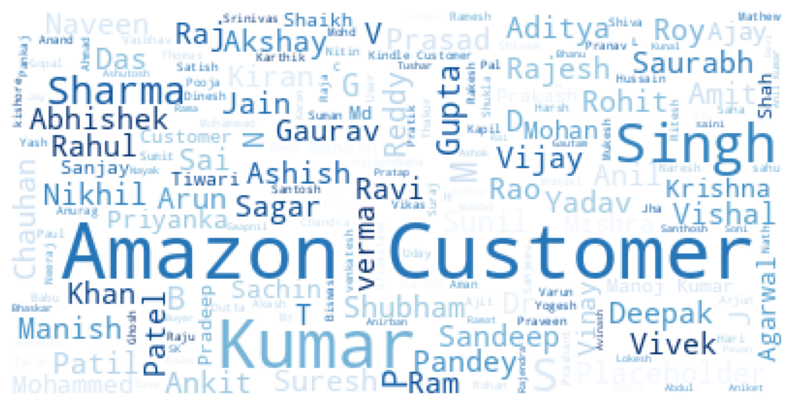

In [268]:
# nuvem de palavras com o nome dos usuários
wc = WordCloud(background_color='white', colormap = 'Blues_r').generate(df_amazon_users['user_names'].to_string())
plt.figure(figsize=(10, 8))
plt.axis("off")
plt.imshow(wc)
plt.show()

Pontos relevantes:
* o nome "AMAZON CUSTOMER" aparece em grande maioria mas para diferentes users_id e consequentemente grupo de clientes ao qual faz parte
* De acordo com os nomes podemos inferir que os clientes são de nacionalidade indiana

**analisando a categoria dos produtos**

In [269]:
# categorias que apresentam a maior quantidade de produtos ( top 15 )
df_amazon.groupby(['category'])['product_id'].count().sort_values(ascending=False)[:15]

,product_id
category,
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,181
Electronics|WearableTechnology|SmartWatches,76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones,68
"Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions",61
"Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear",52
"Electronics|HomeTheater,TV&Video|Accessories|RemoteControls",49
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|MixerGrinders,27
"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cleaning&Ironing|Irons,Steamers&Accessories|Irons|DryIrons",24
"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice",24


In [270]:
# quais são os tipos de produtos mais comprados de forma individual?

df_amazon_cat = df_amazon[['category']]

df_amazon_cat.reset_index(inplace=True)

produtos = {'subcategoria':[]}

for i in range(0,len(df_amazon_cat)):
  prod = tuple(df_amazon_cat['category'][i].split('|'))

  produtos['subcategoria'].append(prod)

df_produtos = pd.DataFrame(columns=['subcategoria'])

for i in range(0,len(df_amazon_cat)):
  p = produtos['subcategoria'][i]
  df_p = pd.DataFrame(p, columns=['subcategoria'])

  df_produtos = pd.concat([df_produtos,df_p],ignore_index=True)

df_produtos.head()

,subcategoria
0,Computers&Accessories
1,Accessories&Peripherals
2,Cables&Accessories
3,Cables
4,USBCables


In [271]:
df_graph = df_produtos.groupby(['subcategoria'])['subcategoria'].count().sort_values(ascending=False).head(15).reset_index(name='Value')
df_graph.rename(columns={'subcategoria': 'Category'}, inplace=True)

sorted_categories = df_graph['Category'].tolist()

# Create a horizontal bar chart
fig = px.bar(df_graph, x='Value', y='Category', orientation='h', title='TOP 15 categorias de produtos mais comprados',
             category_orders={'Category': sorted_categories})

fig.update_layout(
    plot_bgcolor='white',  # Set background color to white
    xaxis=dict(showline=False, showticklabels=False,title=None),  # Remove x-axis labels and ticks
    yaxis=dict(title=None),  # Remove y-axis labels and ticks
    title_x=0.5  # Center the title
)

# Add values at the end of each bar
fig.update_traces(text=df_graph['Value'], textposition='outside', texttemplate='%{text}', showlegend=False,marker_color='blue')

# Show the plot
fig.show()

Pontos relevantes:
* Observamos que a maioria dos produtos comprados fazem parte do grupo de eletronicos e seus derivados. Este grande consumo acarreta em problemas relacionados com o descarte dos materais de forma adequada.

Segundo artigo encontrado neste site : https://www.adityabirla.com/pt/media/stories/waste-to-value-the-circular-solution-to-e-waste/, a Índia é o terceiro maior produtor de lixo eletrônico no mundo.

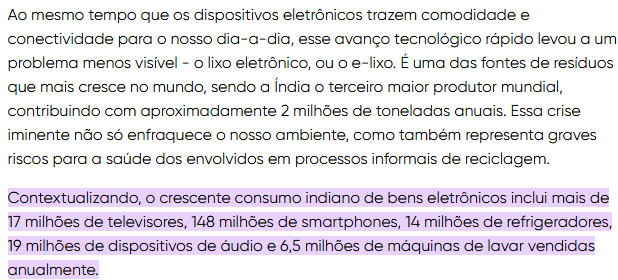



## Observando correlações

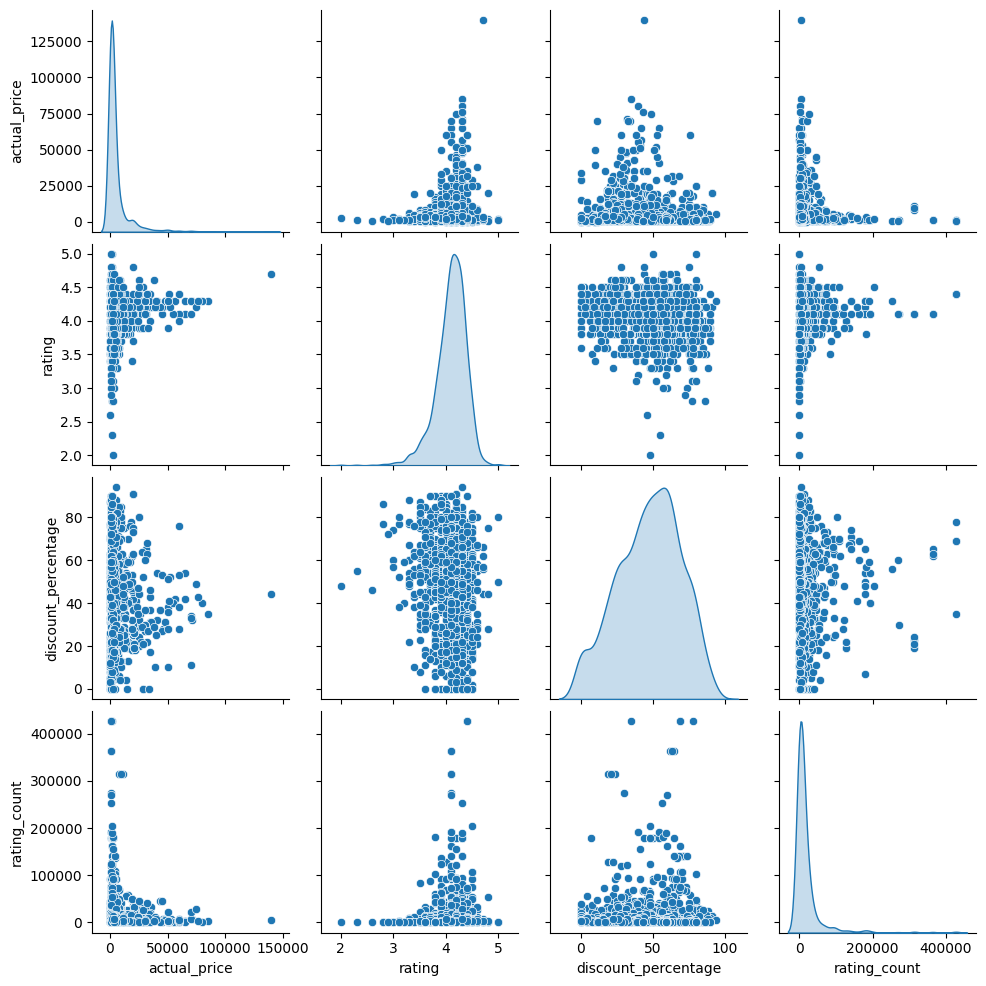

In [272]:
# variáveis numéricas
sns.pairplot(df_amazon[['actual_price','rating','discount_percentage','rating_count']], diag_kind='kde')

Pontos relevantes:
* Os valores apresentam uma distribuição aproximadamente normal
* Os valores tem uma variação discrepante quando comparamos o rating com o rating_count, por exemplo
* Não encontramos uma correlação linear muito bem definida entre estas variáveis

In [273]:
df_amazon[['actual_price','rating','discount_percentage','rating_count']].corr()

,actual_price,rating,discount_percentage,rating_count
actual_price,1.000000,0.126611,-0.112318,-0.037910
rating,0.126611,1.000000,-0.160421,0.104668
discount_percentage,-0.112318,-0.160421,1.000000,0.016707
rating_count,-0.037910,0.104668,0.016707,1.000000


##Analisar outliers

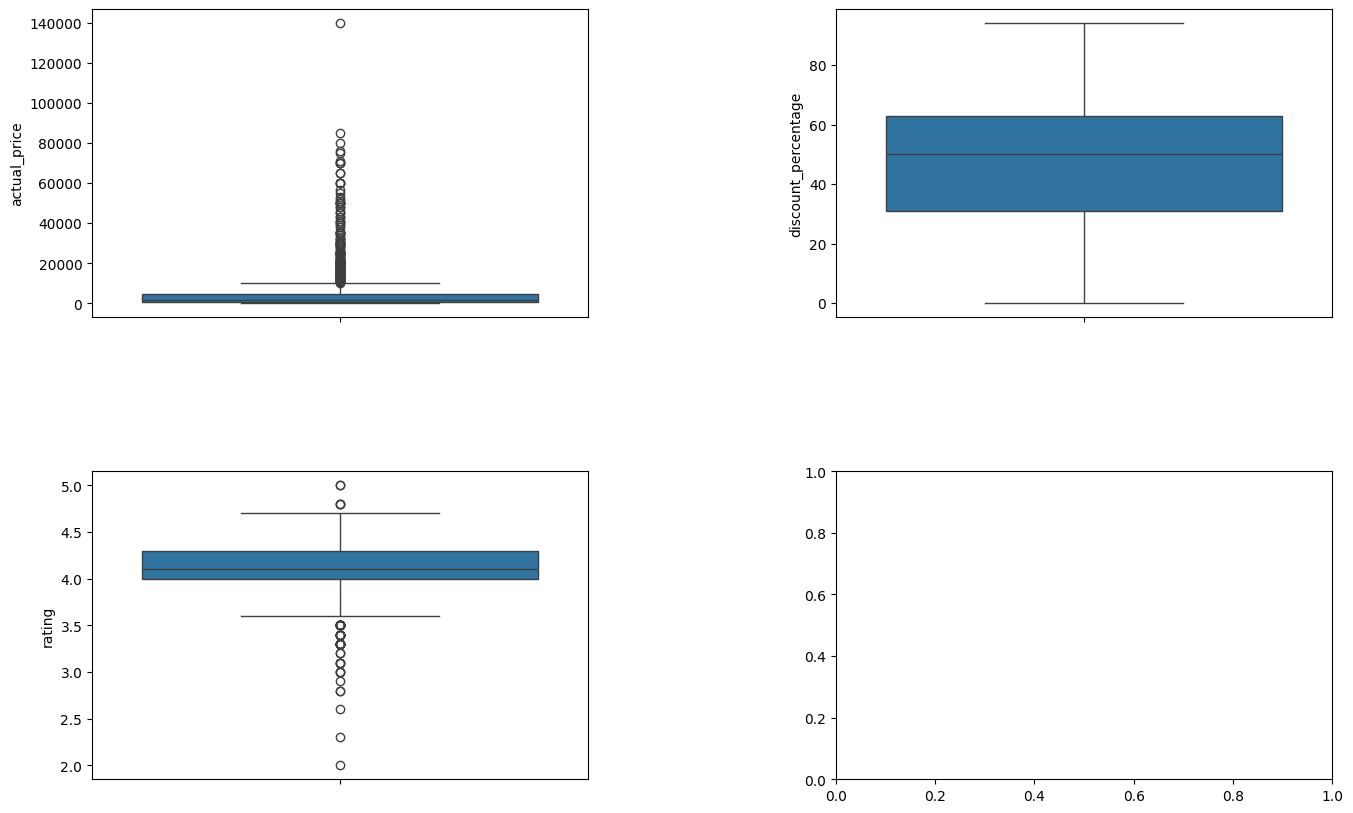

In [274]:
fig, ax = plt.subplots(2,2,figsize=(16, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

sns.boxplot(data=df_amazon['actual_price'], ax=ax[0,0])
sns.boxplot(data=df_amazon['discount_percentage'], ax=ax[0,1])
sns.boxplot(data=df_amazon['rating'], ax=ax[1,0])

plt.show()

Analisar o que fazer com os "outliers" de "actual_price".

In [275]:
df_price = df_amazon.copy()

df_price['analysis_mean'] = df_price['actual_price'].apply(lambda x: 'Acima da média' if x > df_price['actual_price'].mean() else 'Abaixo da média')

df_price.groupby(['analysis_mean'])['product_id'].count()

,product_id
analysis_mean,
Abaixo da média,1089
Acima da média,305


Verificando mais afundo, podemos visualizar que 305 produtos estariam acima da média do preço representando uma fatia de 21,9% dos dados.

In [276]:
df_amazon[df_amazon['actual_price'] == 139900].iloc[:,1].values

array(['Sony Bravia 164 cm (65 inches) 4K Ultra HD Smart LED Google TV KD-65X74K (Black)'],
      dtype=object)

valor considerado um outlier

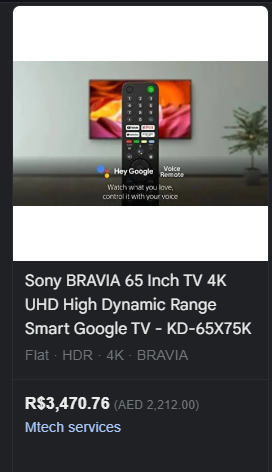

# Agrupamento

  ## SEM PCA


* Retirando outliers da coluna 'actual_price'
* Aplicando MinMaxScaler
* Sem usar PCA
* Agrupando as categorias: xxx|yyy|zzz -> xxxx

Gerando um dataframe para treino

In [277]:
# sem pca
df_amazon_treino = df_amazon.copy()

In [278]:
df_amazon_treino.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1394 entries, 0 to 1394
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1394 non-null   object 
 1   product_name         1394 non-null   object 
 2   category             1394 non-null   object 
 3   discounted_price     1394 non-null   float64
 4   actual_price         1394 non-null   float64
 5   discount_percentage  1394 non-null   float64
 6   rating               1394 non-null   float64
 7   rating_count         1394 non-null   float64
 8   user_id              1394 non-null   object 
 9   user_name            1394 non-null   object 
 10  review_title         1394 non-null   object 
 11  review_content       1394 non-null   object 
dtypes: float64(5), object(7)
memory usage: 141.6+ KB


In [279]:
df_amazon_treino.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'user_id', 'user_name', 'review_title', 'review_content'],
      dtype='object')

In [280]:
df_amazon_treino.drop(['product_id', 'product_name', 'user_id', 'user_name',
                       'review_title', 'review_content'], axis=1, inplace=True)

In [281]:
### NOVO
#Salvando as subcategorias
subcategorias_serie = df_amazon_treino['category'].str.split('|').str[1:]

# Substituindo os valores mantendo apenas o texto antes do primeiro "|"
df_amazon_treino['category'] = df_amazon_treino['category'].str.split('|').str[0]

In [282]:
# Utilizando str.get_dummies() para criar as colunas booleanas
#df_expanded = df_amazon_treino['category'].str.get_dummies(sep='|').add_prefix('cat_')
df_expanded = df_amazon_treino['category'].str.get_dummies().add_prefix('cat_')

# Concatenando com o DataFrame original (opcional)
df_amazon_treino = pd.concat([df_amazon_treino, df_expanded], axis=1)

df_amazon_treino.columns

Index(['category', 'discounted_price', 'actual_price', 'discount_percentage',
       'rating', 'rating_count', 'cat_Car&Motorbike',
       'cat_Computers&Accessories', 'cat_Electronics',
       'cat_Health&PersonalCare', 'cat_Home&Kitchen', 'cat_HomeImprovement',
       'cat_MusicalInstruments', 'cat_OfficeProducts', 'cat_Toys&Games'],
      dtype='object')

In [283]:
category_ori = df_amazon_treino['category'].copy()
print(type(category_ori))
df_amazon_treino.drop(['category'], axis=1, inplace=True)

<class 'pandas.core.series.Series'>


In [284]:
def filtrar_outliers():
  global df_amazon_treino

  # Calculando Q1, Q3 e IQR
  Q1 = df_amazon_treino['actual_price'].quantile(0.25)
  Q3 = df_amazon_treino['actual_price'].quantile(0.75)
  IQR = Q3 - Q1

  # Definindo limites
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR

  # Filtrando valores menores ou iguais a Q3
  df_amazon_treino = df_amazon_treino[(df_amazon_treino['actual_price'] >= limite_inferior) &
                                      (df_amazon_treino['actual_price'] <= limite_superior)]


In [285]:
# Filtrar os outliers
filtrar_outliers()

In [286]:
df_amazon_treino.shape

(1208, 14)

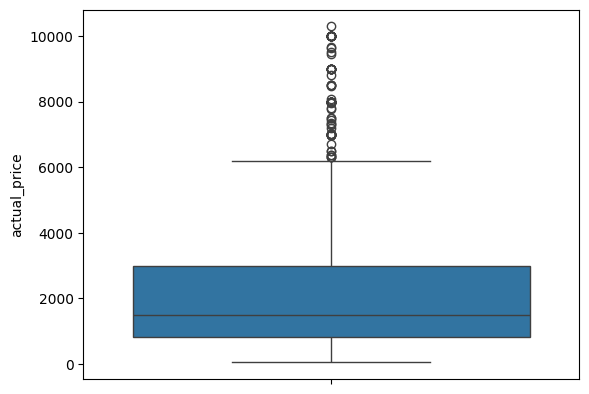

In [287]:
# plotando o gráfico boxplot para a coluna de preço

sns.boxplot(data=df_amazon_treino['actual_price'])

plt.show()

In [288]:
df_amazon_treino.head(1)

,discounted_price,actual_price,discount_percentage,rating,rating_count,cat_Car&Motorbike,cat_Computers&Accessories,cat_Electronics,cat_Health&PersonalCare,cat_Home&Kitchen,cat_HomeImprovement,cat_MusicalInstruments,cat_OfficeProducts,cat_Toys&Games
0,399.0,1099.0,64.0,4.2,24269.0,0,1,0,0,0,0,0,0,0


In [290]:
# gerando a cópia do dado para aplicação do pca para análise futura
df_amazon_treino_pca = df_amazon_treino.copy()

In [291]:
# aplicação da normalização com o MinMaxScaler

scaler = MinMaxScaler()
df_amazon_treino = pd.DataFrame(scaler.fit_transform(df_amazon_treino), columns=df_amazon_treino.columns)

##Gerando os clusters

Analisando o valor de k através do gráfico de cotovelo

In [292]:
num_clusters_i = 2
num_clusters_f = 6

inertia = []
silhouette_scores = []
for k in range(1, num_clusters_f + 1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_amazon_treino)
    inertia.append(kmeans.inertia_)
    # Silhouette scores
    if k > 1:
      silhouette_scores.append(silhouette_score(df_amazon_treino,kmeans.labels_))

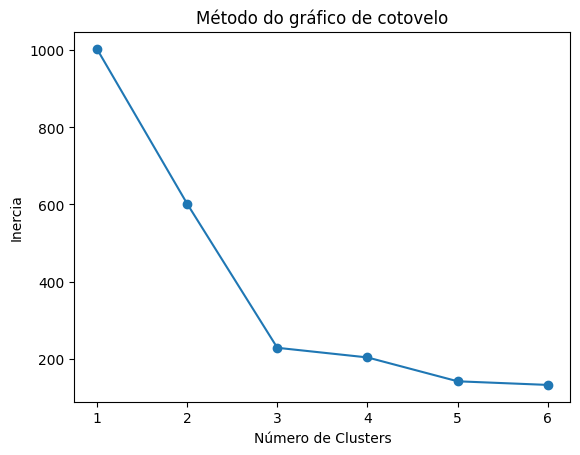

In [293]:
plt.plot(range(1, num_clusters_f + 1), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método do gráfico de cotovelo')
plt.show()

Obs: O valor mais indicado para o k seria 3 de acordo com o gráfico acima

Analisar o número de clusters utilizando Silhouette Scores.

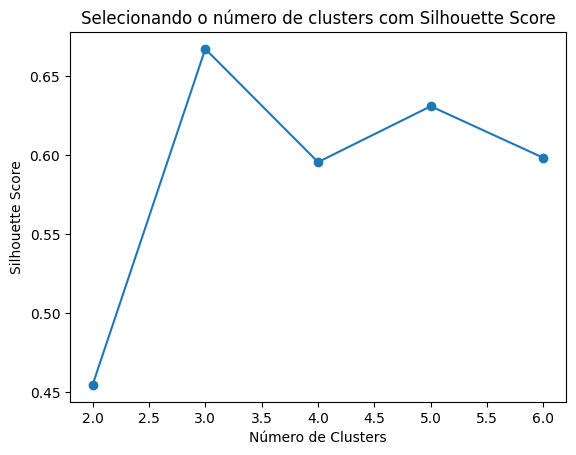

In [294]:
# Gráfico com os Silhouette Scores
plt.plot(range(num_clusters_i, num_clusters_f + 1), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.title('Selecionando o número de clusters com Silhouette Score')
plt.show()

Analisando tanto o método Elbow como os Silhouette Scores, podemos identificar que k=3 é a melhor escolha.

Vamos analisar o Silhouette Diagram (gráfico em formato de faca) para confirmar essa escolha.

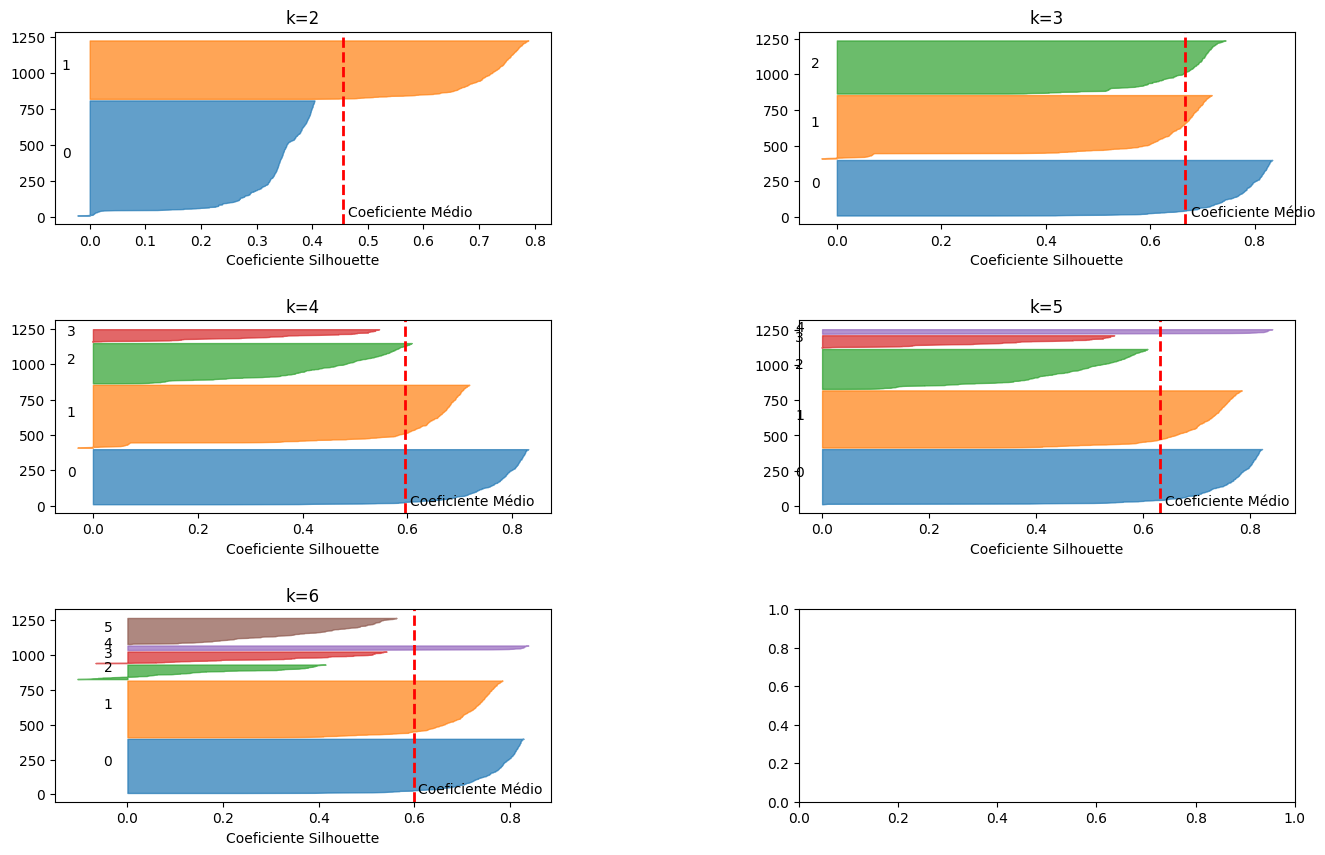

In [295]:
nlin = int(np.ceil((num_clusters_f - num_clusters_i + 1) / 2))

fig, ax = plt.subplots(nlin,2,figsize=(16, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

for n_clusters in range(num_clusters_i, num_clusters_f + 1):

    lin = (n_clusters - num_clusters_i) // 2
    col = (n_clusters - num_clusters_i) % 2

    kmeans = KMeans(n_clusters, random_state=0)
    kmeans.fit(df_amazon_treino)

    mean_silhouette_score = silhouette_score(df_amazon_treino,kmeans.labels_)

    # Calcular o silhouette para cada ponto individualmente
    silhouette_values = silhouette_samples(df_amazon_treino, kmeans.labels_)

    # Criar o Silhouette Diagram
    ax[lin, col].set_title(f'k={n_clusters}')
    ax[lin, col].set_xlabel('Coeficiente Silhouette')
    ax[lin, col].annotate("Coeficiente Médio", (mean_silhouette_score + 0.01, 5), fontsize=10)

    #debug
    #valores_unicos, contagens = np.unique(kmeans.labels_, return_counts=True)
    #print("Valores únicos:", valores_unicos)
    #print("Contagem de cada valor:", contagens)

    n_clusters = len(np.unique(kmeans.labels_))
    y_lower = 10
    for i in range(n_clusters):
        #print(f'Cluster {i}')
        cluster_silhouette_values = silhouette_values[kmeans.labels_ == i]
        cluster_silhouette_values.sort()
        cluster_size = cluster_silhouette_values.shape[0]

        #print(f'Clusters_size: {cluster_size}, Valores:{cluster_silhouette_values}')

        y_upper = y_lower + cluster_size

        color = plt.cm.tab10(i)
        ax[lin,col].fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax[lin, col].text(-0.05, y_lower + 0.5 * cluster_size, str(i))

        y_lower = y_upper + 10

    #plt.axvline
    ax[lin,col].axvline(x=mean_silhouette_score, color='red', linestyle='--', linewidth=2)

Podemos observar que no gráfico para k=3 temos os clusters com aprox. o mesmo número de elementos e a parte (as amostras) mais próximas a ponta da faca estão a direita do valor médio do coeficiente (linha vermelha).  

Aplicando o Kmeans



In [296]:
# Escolhemos k = 3
k = 3

In [297]:
kmeans = KMeans(k, random_state=0)
kmeans.fit(df_amazon_treino)

KMeans(n_clusters=3, random_state=0)

## Analise de cada cluster

In [298]:
# Desfazendo a normalização dos dados no conjunto original
if 'rating_str' in df_amazon_treino.columns:
  df_amazon_treino.drop('rating_str', axis=1, inplace=True)

# criando a coluna de label a partir do rating
rating_str = pd.cut(df_amazon_treino['rating'],
                                  bins=[0.0, 0.4, 0.7, 1],
                                  labels=['ruim', 'médio', 'bom'],
                                  include_lowest=True)

In [299]:
aux = scaler.inverse_transform(df_amazon_treino)

In [300]:
df_amazon_treino = pd.DataFrame(aux, columns=df_amazon_treino.columns)
df_aux = pd.DataFrame(rating_str)
df_amazon_treino['rating_str'] = df_aux

In [301]:
# Restaurar a coluna de categoria original e excluir as criadas com get_dummies / One Hot Encoder
df_amazon_treino = df_amazon_treino.drop(df_amazon_treino.filter(like='cat_').columns, axis=1)
df_amazon_treino['category'] = category_ori

In [302]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [303]:
df_amazon_treino['cluster_id'] = kmeans.labels_

In [304]:
df_cluster1 = df_amazon_treino[df_amazon_treino['cluster_id'] == 0].copy()
df_cluster2 = df_amazon_treino[df_amazon_treino['cluster_id'] == 1].copy()
df_cluster3 = df_amazon_treino[df_amazon_treino['cluster_id'] == 2].copy()

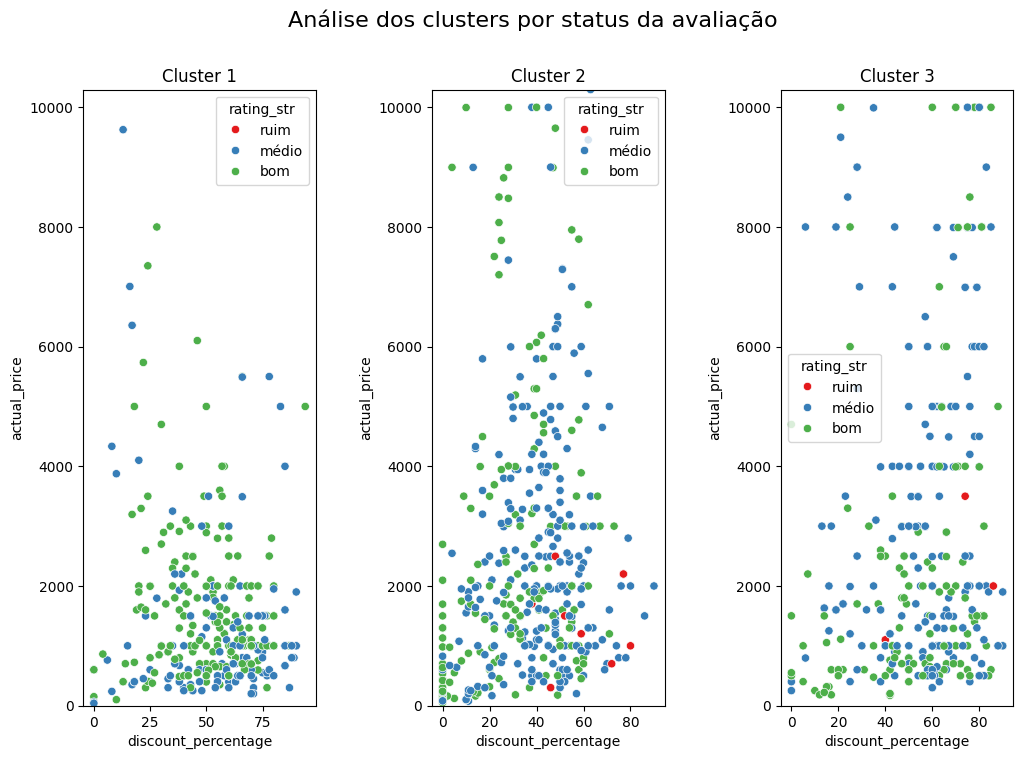

In [305]:
fig, ax = plt.subplots(1,3,figsize=(12, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

max_price = df_amazon_treino['actual_price'].max()
hue = 'rating_str'

fig.suptitle("Análise dos clusters por status da avaliação", fontsize=16)

# hue='rating'
sns.scatterplot(df_cluster1, x='discount_percentage', y='actual_price', hue=hue, palette='Set1', ax=ax[0])
ax[0].set_ylim(0,max_price)
ax[0].set_title('Cluster 1')

sns.scatterplot(df_cluster2, x='discount_percentage', y='actual_price', hue=hue, palette='Set1', ax=ax[1])
ax[1].set_ylim(0,max_price)
ax[1].set_title('Cluster 2')

sns.scatterplot(df_cluster3, x='discount_percentage', y='actual_price', hue=hue, palette='Set1', ax=ax[2])
ax[2].set_ylim(0,max_price)
ax[2].set_title('Cluster 3')


plt.show()

* Cluster 1: Podemos dizer que a avaliação é muito positiva em relação ao preço e desconto, pois não conseguimos visualizar a classificação ruim no gráfico.
* Cluster 2: Apresenta em grande maioria a avaliação do tipo Bom. Temos algumas avaliações negativas mas não se sobressaem perante as positivas.
* Cluster 3: Apresenta uma característica similar ao cluster 2 em relação a distribuição da classificação positiva.

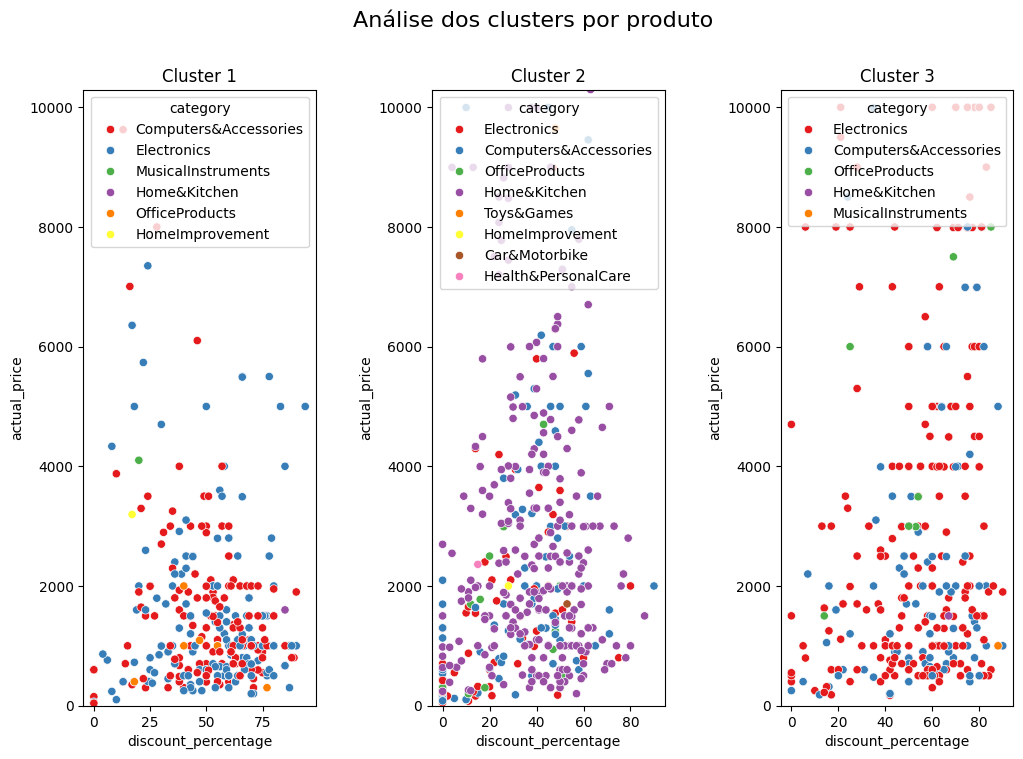

In [306]:
fig, ax = plt.subplots(1,3,figsize=(12, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

max_price = df_amazon_treino['actual_price'].max()
#hue = 'rating_str'
hue='category'

fig.suptitle("Análise dos clusters por produto", fontsize=16)

sns.scatterplot(df_cluster1, x='discount_percentage', y='actual_price', hue=hue, palette='Set1', ax=ax[0])
ax[0].set_ylim(0,max_price)
ax[0].set_title('Cluster 1')

sns.scatterplot(df_cluster2, x='discount_percentage', y='actual_price', hue=hue, palette='Set1', ax=ax[1])
ax[1].set_ylim(0,max_price)
ax[1].set_title('Cluster 2')

sns.scatterplot(df_cluster3, x='discount_percentage', y='actual_price', hue=hue, palette='Set1', ax=ax[2])
ax[2].set_ylim(0,max_price)
ax[2].set_title('Cluster 3')

plt.show()

Análise dos clusters

* Cluster 1: Produtos com um valor menor e uma porcentagem de desconto alta (54%)

* Cluster 2: Produtos com um valor mais elevado e com uma porcentagem de desconto baixa/média (38%)

* Cluster 3: Produtos com um valor intermediário (de médio para alto) e com uma porcentagem de desconto alta (56%)

No que se refere a distribuição das categorias de produtos nos clusters, vemos que:

* O cluster 1 possui principalmente produtos das categorias "Computer&Accessories" e "Electronics".

* O cluster 2 possui principalmente produtos da categoria "Home&Kitchen".

* O cluster 3 também possui predominantemente produtos das categorias "Computer&Accessories" e "Electronics", porém com uma maioria para esta última categoria.

In [307]:
# Gerar a descrição completa para cada cluster
for cluster in df_amazon_treino['cluster_id'].unique():
    cluster_data = df_amazon_treino[df_amazon_treino['cluster_id'] == cluster]
    print(f"Cluster {cluster}:")
    print(cluster_data.describe())  # Estatísticas descritivas de cada cluster
    print("\n")

Cluster 0:
       discounted_price  actual_price  discount_percentage      rating  \
count        390.000000    390.000000           390.000000  390.000000   
mean         690.856385   1406.416103            53.725641    4.151795   
std          912.278601   1275.665370            20.193387    0.257902   
min           39.000000     39.000000             0.000000    3.300000   
25%          228.250000    650.000000            41.000000    4.000000   
50%          379.000000    999.000000            57.000000    4.200000   
75%          764.750000   1736.500000            67.000000    4.300000   
max         8349.000000   9625.000000            94.000000    5.000000   

        rating_count  cluster_id  
count     390.000000       390.0  
mean    17609.974359         0.0  
std     31349.847460         0.0  
min         5.000000         0.0  
25%      1696.750000         0.0  
50%      7710.500000         0.0  
75%     20442.250000         0.0  
max    253105.000000         0.0  


Clust

In [308]:
# criação das subcategorias
df_amazon_treino['subcategorias'] = subcategorias_serie
df_amazon_treino.head()

,discounted_price,actual_price,discount_percentage,rating,rating_count,rating_str,category,cluster_id,subcategorias
0,399.0,1099.0,64.0,4.2,24269.0,bom,Computers&Accessories,0,"[Accessories&Peripherals, Cables&Accessories, ..."
1,199.0,349.0,43.0,4.0,43994.0,médio,Computers&Accessories,0,"[Accessories&Peripherals, Cables&Accessories, ..."
2,199.0,1899.0,90.0,3.9,7928.0,médio,Computers&Accessories,0,"[Accessories&Peripherals, Cables&Accessories, ..."
3,329.0,699.0,53.0,4.2,94363.0,bom,Computers&Accessories,0,"[Accessories&Peripherals, Cables&Accessories, ..."
4,154.0,399.0,61.0,4.2,16905.0,bom,Computers&Accessories,0,"[Accessories&Peripherals, Cables&Accessories, ..."


In [309]:
subcategorias_serie[3]

['Accessories&Peripherals', 'Cables&Accessories', 'Cables', 'USBCables']

In [ ]:
# Gerando o arquivo CSV
#df_amazon_treino.to_csv('amazon-cat.csv', index=False)

## Avaliação com o método PCA

Vamos adicionar este tópico para comprovar que a aplicação da clusterização obteve um melhor resultado sem o PCA

In [310]:
df_amazon_treino_pca.head(1)

,discounted_price,actual_price,discount_percentage,rating,rating_count,cat_Car&Motorbike,cat_Computers&Accessories,cat_Electronics,cat_Health&PersonalCare,cat_Home&Kitchen,cat_HomeImprovement,cat_MusicalInstruments,cat_OfficeProducts,cat_Toys&Games
0,399.0,1099.0,64.0,4.2,24269.0,0,1,0,0,0,0,0,0,0


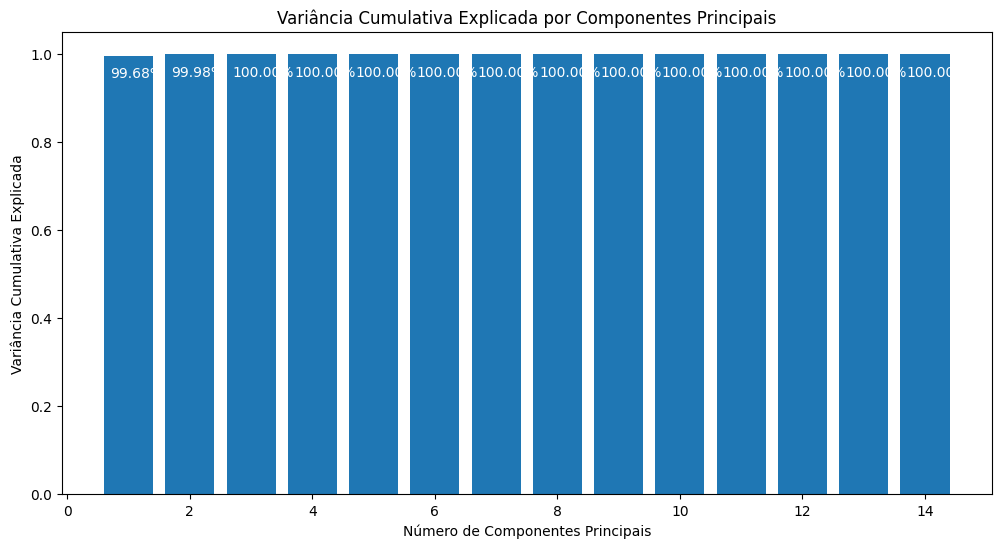

In [315]:
# PCA
from sklearn.decomposition import PCA

# Inicialize o PCA com o número de componentes desejado ou None para manter todos os componentes
n_components = df_amazon_treino_pca.shape[1]
pca = PCA(n_components=n_components)

# Ajuste o modelo PCA aos seus dados
pca.fit(df_amazon_treino_pca)

# Calcule a variância explicada cumulativa
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

# Crie um gráfico da variância cumulativa
plt.figure(figsize=(12, 6))
bars = plt.bar(range(1, len(explained_variance_ratio_cumulative) + 1), explained_variance_ratio_cumulative)
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Cumulativa Explicada')
plt.title('Variância Cumulativa Explicada por Componentes Principais')
# plt.axhline(y=0.958, c='red', linestyle=':')
# plt.axvline(x=15, c='red', linestyle=':')


# Adicione as porcentagens como rótulos nas barras
for bar, explained_variance in zip(bars, explained_variance_ratio_cumulative):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.3, bar.get_height() - 0.05, f'{explained_variance:.2%}', fontsize=10, color='white')

plt.show()

Obs: Com 2 componentes conseguimos obter cerca de 99,98% de variabilidade

In [316]:
n_components = 2
pca = PCA(n_components=n_components)

In [318]:
# Ajuste o modelo PCA aos seus dados
amazon_pca = pca.fit_transform(df_amazon_treino_pca)

In [319]:
amazon_pca.shape

(1208, 2)

In [320]:
df_amazon_pca = pd.DataFrame(amazon_pca, columns=[f'PC{i+1}' for i in range(n_components)])

df_amazon_pca

,PC1,PC2
0,5084.980282,-1370.391998
1,24808.543233,-2164.872082
2,-11254.884906,-722.646797
3,75178.143952,-1888.627840
4,-2280.370562,-2090.634651
...,...,...
1203,-18094.289245,-1495.916100
1204,-15061.062023,1262.090141
1205,-18711.056484,1271.786532
1206,-11150.768670,-176.561862


Avaliar os dados de acordo com o método de cotovelo e o coeficiente de silhueta

In [322]:
num_clusters_i = 2
num_clusters_f = 6

inertia = []
silhouette_scores = []
for k in range(1, num_clusters_f + 1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_amazon_pca)
    inertia.append(kmeans.inertia_)
    # Silhouette scores
    if k > 1:
      silhouette_scores.append(silhouette_score(df_amazon_pca,kmeans.labels_))

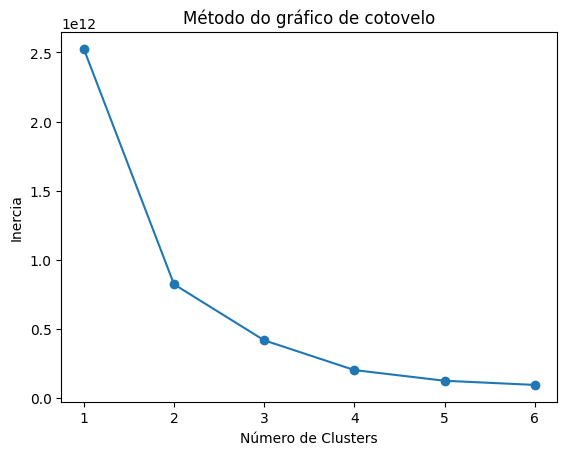

In [323]:
plt.plot(range(1, num_clusters_f + 1), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método do gráfico de cotovelo')
plt.show()

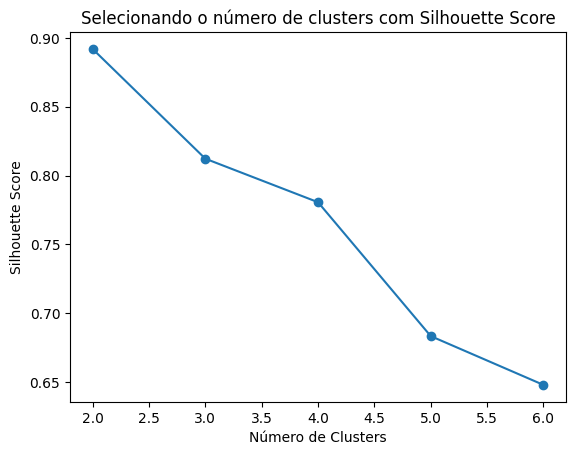

In [324]:
# Gráfico com os Silhouette Scores
plt.plot(range(num_clusters_i, num_clusters_f + 1), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.title('Selecionando o número de clusters com Silhouette Score')
plt.show()

De acordo com o gráfico do método de cotovelo e o coeficiente de silhueta teríamos a indicação do k = 2.

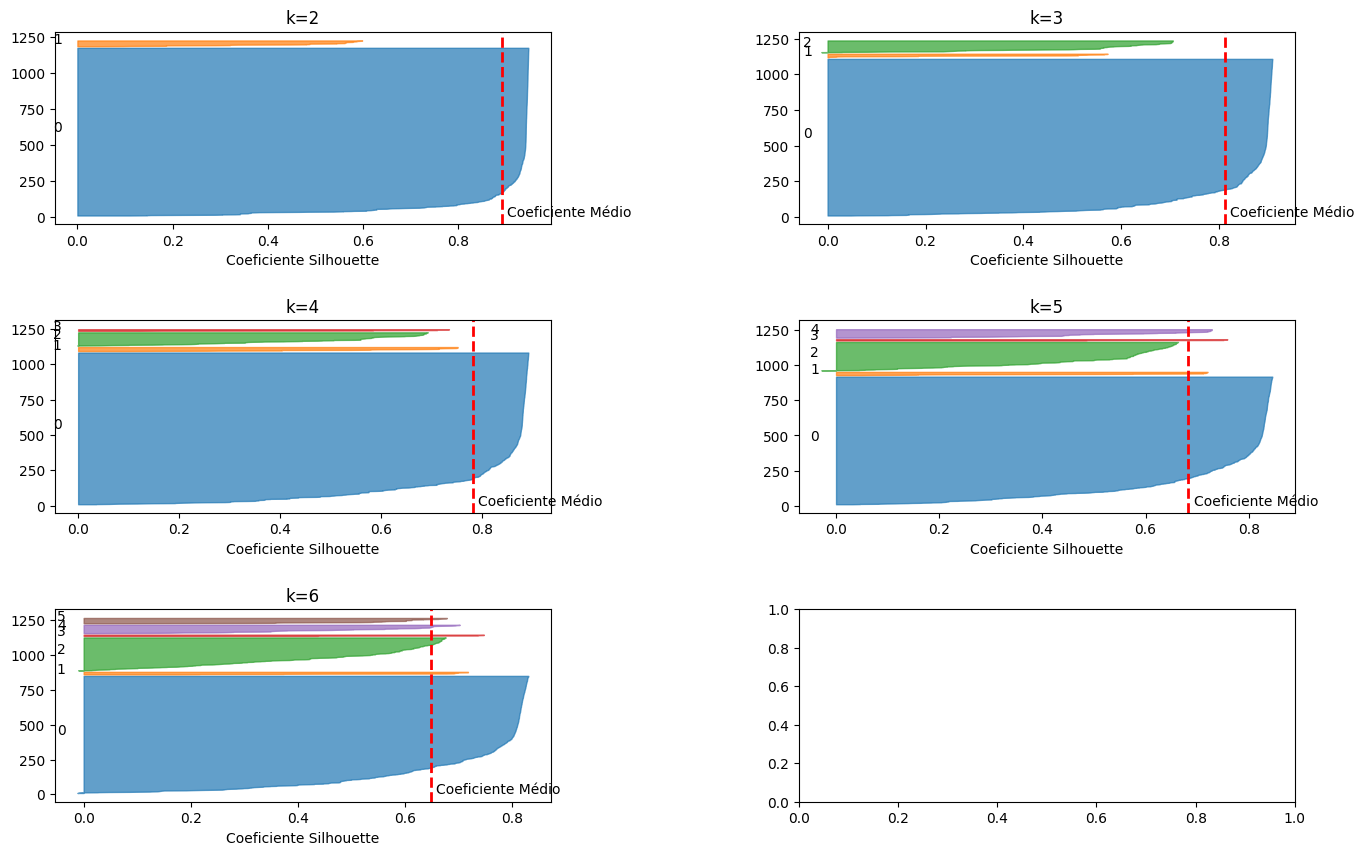

In [325]:
nlin = int(np.ceil((num_clusters_f - num_clusters_i + 1) / 2))

fig, ax = plt.subplots(nlin,2,figsize=(16, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

for n_clusters in range(num_clusters_i, num_clusters_f + 1):

    lin = (n_clusters - num_clusters_i) // 2
    col = (n_clusters - num_clusters_i) % 2

    kmeans = KMeans(n_clusters, random_state=0)
    kmeans.fit(df_amazon_pca)

    mean_silhouette_score = silhouette_score(df_amazon_pca,kmeans.labels_)

    # Calcular o silhouette para cada ponto individualmente
    silhouette_values = silhouette_samples(df_amazon_pca, kmeans.labels_)

    # Criar o Silhouette Diagram
    ax[lin, col].set_title(f'k={n_clusters}')
    ax[lin, col].set_xlabel('Coeficiente Silhouette')
    ax[lin, col].annotate("Coeficiente Médio", (mean_silhouette_score + 0.01, 5), fontsize=10)

    #debug
    #valores_unicos, contagens = np.unique(kmeans.labels_, return_counts=True)
    #print("Valores únicos:", valores_unicos)
    #print("Contagem de cada valor:", contagens)

    n_clusters = len(np.unique(kmeans.labels_))
    y_lower = 10
    for i in range(n_clusters):
        #print(f'Cluster {i}')
        cluster_silhouette_values = silhouette_values[kmeans.labels_ == i]
        cluster_silhouette_values.sort()
        cluster_size = cluster_silhouette_values.shape[0]

        #print(f'Clusters_size: {cluster_size}, Valores:{cluster_silhouette_values}')

        y_upper = y_lower + cluster_size

        color = plt.cm.tab10(i)
        ax[lin,col].fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax[lin, col].text(-0.05, y_lower + 0.5 * cluster_size, str(i))

        y_lower = y_upper + 10

    #plt.axvline
    ax[lin,col].axvline(x=mean_silhouette_score, color='red', linestyle='--', linewidth=2)

Observamos que houve um grande desbalanceamento dos dados clusterizados. Por isto preferimos seguir com a aplicação da clusterização sem a utilização do PCA



---

